<a href="https://colab.research.google.com/github/lauratcc18/IAMINTIC/blob/main/2_Mutual_y_chi2_seleccion_caract_filtro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selección de Características
## Método de filtrado estadístico con datos categóricos
Usaremos un dataset de cancer de seno para clasificar los pacientes como recurrentes o no en cancer.

Esta dataset lo tomaremos de https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv

### 1. Cargar Dataframe

In [ ]:
from pandas import read_csv
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
df = read_csv (url, header = None)


Usando la función head, imprima las primeras filas del dataframe y observe el tipo de datos de las variables que incluye.

Puede observar los tipos de datos de las columnas usando la función dtypes  

In [ ]:
# Escriba su código aqui
df.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


Haga doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta::

df.head()
df.dtypes
df.shape

// Se observan 8 variables de entrada categóricas y una salida también categórica.
// Python reconoce los tipos de datos como objeto.
-->

### 2. Extraer los arreglos de entrada y salida
Convertimos el dataframe en un arreglo y dividimos las columnas en entradas (X) y salida (Y) para proceder a modelarlas. Adicionalmente forzamos para que todos los campos de entrada sean string y así evitar que Pandas intente mapearlos automáticamente a números.

In [ ]:
dataset = df.values
X = dataset[:, :-1]
y = dataset[:, -1]
X = X.astype(str)
X.shape

(286, 9)

### 3. Crear sets de entrenamiento y de prueba
El objetivo de este paso es poder ajustar y evaluar el modelo. Para ello usamos la función train_test_split() de sklearn, usando el 67% de los datos para entrenamiento y el 33% restante para pruebas.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos entradas y salida en sets de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


Observe la forma / tamaño de los sets

<!-- Puede usar:
print('Train: in / out ', X_train.shape, y_train.shape)
print('Test: in / out ', X_test.shape, y_test.shape)
-->

In [ ]:
# Escriba su código aqui


### 4. Codificar los datos para poder modelarlos
####4.1 Codificación de entradas
Este paso busca codificar cada variable categórica de entrada en un arreglo de números enteros usando el método OrdinalEncoder() de sklearn.
Una buena práctica es ajustar (fit) el codificador con los datos de entrenamiento y luego aplicarlo tanto a los datos de entrenamiento como a los de prueba.

Si desea puede observar como quedan los sets codificados

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)
X_train_enc

array([[ 3.,  0.,  4., ...,  0.,  3.,  0.],
       [ 1.,  2.,  9., ...,  0.,  3.,  0.],
       [ 3.,  2., 10., ...,  1.,  2.,  1.],
       ...,
       [ 4.,  0.,  1., ...,  1.,  1.,  0.],
       [ 4.,  0.,  7., ...,  1.,  1.,  0.],
       [ 4.,  0.,  8., ...,  0.,  0.,  0.]])

####4.2 Codificación de salidas
También es necesario codificar la variable objetivo, en este caso como un problema de clasificación binaria: mapear las etiquetas de dos clases (recurrente / no-recurrente) a 1 y 0. El método LableEncoder() esta diseñado para codificación ordinal de una variable sencilla.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
y_train_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

###5. Aplicar el método de selección de características
####5.1 Chi-cuadrado
Método que realiza una prueba de independiencia entre variables categóricas. Las características que sean independientes de la variable objetivo, pueden ser eliminadas. Para aplicar este método se usa la función chi2() de sklearn, en combinación con SelectKBest



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Selección de características con chi2
fs = SelectKBest(score_func=chi2, k="all")
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

Procedemos a imprimir los puntajes de cada variable (entre más alto, mejor) y a dibujarlos para darnos una idea de cuántas características deberíamos seleccionar.

Atributo 0: 0.472553
Atributo 1: 0.029193
Atributo 2: 2.137658
Atributo 3: 29.381059
Atributo 4: 8.222601
Atributo 5: 8.100183
Atributo 6: 1.273822
Atributo 7: 0.950682
Atributo 8: 3.699989



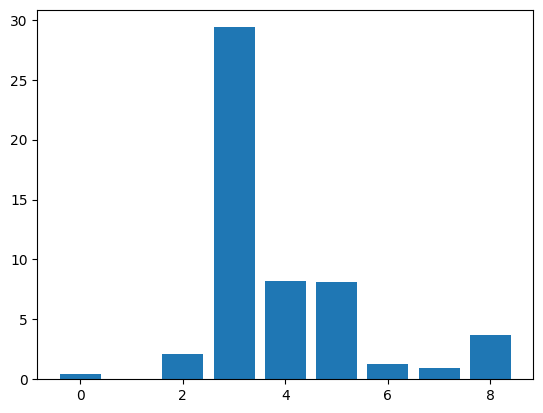

In [ ]:
from matplotlib import pyplot

# Puntajes de las características
for i in range(len(fs.scores_)):
	print('Atributo %d: %f' % (i, fs.scores_[i]))
# Diagrama de puntajes
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
print()
pyplot.show()

Los puntajes y la gráfica muestran que las características más relevantes para chi-cuadrado. Esto permite tomar la decisión de asginar un k específico en SelectKBest para seleccionar los mejores atributos.

<B> ¿Qué valor de k seleccionaría? </B>

####5.2 Mutual Information
Este método aplica la ganancia de información (usada en la construcción de árboles de decisión), para la selección de características. La información mutua se calcula entre dos variables para medir la reducción en la incertidumbre de una variable dado el valor conocido de otra.

En sklearn se usa la función mutual_info_classif() en combinación con SelectKBest.

<B> Digite el código necesario para realizar selección de caracteristicas usando Mutual Information </B>

<!-- Puede utilizar el siguiente código:

# Selección de características con mutual information
fsm = SelectKBest(score_func=mutual_info_classif, k='all')
fsm.fit(X_train_enc, y_train_enc)
X_train_fsm = fsm.transform(X_train_enc)
X_test_fsm = fsm.transform(X_test_enc)

-->

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Digite su código aqui


<B> Imprima y grafique los puntajes </B>

<!-- Puede utlizar el siguiente código_

# Puntajes de las características
for i in range(len(fsm.scores_)):
	print('Atributo %d: %f' % (i, fsm.scores_[i]))
# Diagrama de puntajes
pyplot.bar([i for i in range(len(fsm.scores_))], fsm.scores_)
print()
pyplot.show()

-->

In [ ]:
# Puntajes de las características


Al igual que en el caso anterior, de acuerdo a los puntajes se puede ajustar el top-k de características a seleccionar.

###6. Bono: Modelar
Con tantos métodos para seleccionar características, ¿cuál uso?

La idea sería evaluar varios de ellos con diversos números de características, buscando el modelo que genere el mejor desempeño.

Comparemos los resultados que se obtendrían si se aplica un modelo de Regresión logística que utilice todas las variables de entrada disponibles, contra los modelos con características seleccionadas por chi-cuadrado y por Información mutua.

####6.1 Modelo usando todas las características
Vamos a usar LogisticRegression aplicada sobre el modelo original, con un algoritmo de optimización lbfgs.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Ajustar el modelo
modeloRL = LogisticRegression(solver='lbfgs')
modeloRL.fit(X_train_enc, y_train_enc)
# Evaluar el modelo
ypred = modeloRL.predict(X_test_enc)
# Evaluar la predicción
exactitud = accuracy_score(y_test_enc, ypred)
print('Exactitud: %.2f' % (exactitud*100))

Exactitud: 75.79


####6.2 Modelo reducido con Chi2
Seleccionemos las 4 características más relevantes y generemos el modelo

In [ ]:
# Selección de top-4 caracterítsticas con chi2
fs = SelectKBest(score_func=chi2, k=4)
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

# Ajustar el modelo
modeloChi2 = LogisticRegression(solver='lbfgs')
modeloChi2.fit(X_train_fs, y_train_enc)
# Evaluar el modelo
ypredChi2 = modeloChi2.predict(X_test_fs)
# Evaluar la predicción
exactitudChi2 = accuracy_score(y_test_enc, ypredChi2)
print('Exactitud Chi2: %.2f' % (exactitudChi2*100))

Exactitud Chi2: 74.74


####6.3 Modelo reducido con Mutual Information
Seleccionemos las 4 características más relevantes y generemos el modelo

In [ ]:
# Selección de top-4 caracterítsticas con chi2
fsm = SelectKBest(score_func=mutual_info_classif, k=5)
fsm.fit(X_train_enc, y_train_enc)
X_train_fsm = fsm.transform(X_train_enc)
X_test_fsm = fsm.transform(X_test_enc)

# Ajustar el modelo
modeloMI = LogisticRegression(solver='lbfgs')
modeloMI.fit(X_train_fsm, y_train_enc)
# Evaluar el modelo
ypredMI = modeloMI.predict(X_test_fsm)
# Evaluar la predicción
exactitudMI = accuracy_score(y_test_enc, ypredMI)
print('Exactitud MI: %.2f' % (exactitudMI*100))

NameError: ignored

<B> ¿Qué conclusiones puede obtener de los resultados? </B>